In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta   

# Zillow Investment Research
### An investor with 7.5 million dollars wishes to purchase single family homes and rent the properties. Blooming markets with good re-sale potential are an additional opportunity.

## Part 1: Home Values
### Which part of the coutry will be best for maximizing investment gains?

## HOME VALUES
### Zillow Home Value Index (ZHVI): 
A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure.
 - Data used:  ZVHI Single Family Homes Time Series, Metro & US

## HOME VALUES FORECASTS
### Zillow Home Value Forecast (ZHVF): 
A month-ahead, quarter-ahead and year-ahead forecast of the Zillow Home Value Index (ZHVI). ZHVF is created using the all homes, mid-tier cut of ZHVI and is available both raw and smoothed, seasonally adjusted.

In [2]:
# Read and load the data

df_zhvi = pd.read_csv("ZillowHomeValueIndexSFH.csv")
# Remove USA as a whole
df_zhvi = df_zhvi.iloc[1:]

df_zhvf = pd.read_csv("ZillowHomeValueForecast.csv")
# Remove USA as a whole
df_zhvf = df_zhvf.iloc[1:]
# Renaming date string columns for improved access
df_zhvf = df_zhvf.rename(columns={"2023-11-30": "Nov2023", "2024-01-31": "Jan2024", "2024-10-31": "Oct2024"})

In [3]:
# Zillow Home Value Index (ZHVI)
display(df_zhvi.head(10))

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
1,394913,1,"New York, NY",msa,NY,215463.077687,216373.762188,217289.581879,219141.856194,221050.213170,...,618133.837762,617664.688468,618799.631154,621568.129318,626136.917021,630600.822278,634351.673578,637836.752746,640805.575571,643587.628307
2,753899,2,"Los Angeles, CA",msa,CA,229026.477610,229900.522839,231038.347093,233305.977437,235766.959641,...,904722.060482,893457.496445,883395.779015,881115.971201,885371.384642,893876.716530,905996.956127,920529.313037,935055.399823,947129.418243
3,394463,3,"Chicago, IL",msa,IL,155951.316093,156102.727529,156381.553401,157075.133391,157903.990021,...,304248.609084,304343.228526,305229.343681,307104.303304,309369.884408,312018.033173,314656.564136,317118.293571,318865.465674,320164.890952
4,394514,4,"Dallas, TX",msa,TX,125900.008851,125955.692217,126024.404006,126198.648414,126423.046242,...,372055.029892,369804.481180,368278.040692,367744.725277,368043.835378,368870.836619,369844.515891,370749.341158,371136.641020,371224.593380
5,394692,5,"Houston, TX",msa,TX,122016.023624,122036.153651,121948.043391,122002.165030,122051.133982,...,306009.689971,304307.769928,303131.609899,302658.013562,302788.285303,303581.779166,304505.643986,305382.978225,305742.237843,305772.530915
6,395209,6,"Washington, DC",msa,VA,186569.460198,186736.575493,187023.671292,187679.039472,188661.219772,...,552912.674606,552749.039359,552964.959176,554650.143685,557367.139687,561180.199771,564649.475435,567437.454601,569210.012777,570446.150824
7,394974,7,"Philadelphia, PA",msa,PA,122624.302132,122894.109641,123081.215272,123539.782485,123977.978391,...,332626.474993,332833.263243,333869.701875,335852.080166,338750.167191,341763.134702,344684.541937,347353.537490,349619.698186,351290.349429
8,394856,8,"Miami, FL",msa,FL,131569.272854,131947.837414,132344.859574,133141.642094,133906.570387,...,523679.275628,523830.534757,524502.836041,526287.665404,529312.924872,533533.651021,538115.428696,542688.524220,546537.800001,550440.259960
9,394347,9,"Atlanta, GA",msa,GA,145700.103627,146025.541923,146412.384488,147237.547900,148162.703810,...,369138.233523,367877.569473,367597.552041,368048.706656,369361.652000,371132.868184,373128.910353,374995.697066,376564.486130,377819.929041
10,394404,10,"Boston, MA",msa,MA,225418.155061,226314.152573,227291.179271,229078.292943,231003.903508,...,644628.106173,643594.395680,644112.987903,648377.127369,655248.062815,663070.867524,670539.145540,677585.564997,683697.794487,688716.382914


## Calculating Historical Growth
### Add columns with historical percent increase for 1, 5, and 10 years

In [4]:
def valueChange(current, previous):
    return 100 * ((current - previous)/current)

In [5]:
df_zhvi['LastYrGrowth'] = valueChange(df_zhvi['2023-10-31'], df_zhvi['2022-10-31'])
df_zhvi['LastFiveYrGrowth'] = valueChange(df_zhvi['2023-10-31'], df_zhvi['2018-10-31'])
df_zhvi['LastTenYrGrowth'] = valueChange(df_zhvi['2023-10-31'], df_zhvi['2013-10-31'])
df_zhvi.iloc[2]

RegionID                   394463
SizeRank                        3
RegionName            Chicago, IL
RegionType                    msa
StateName                      IL
                        ...      
2023-09-30          318865.465674
2023-10-31          320164.890952
LastYrGrowth             4.414234
LastFiveYrGrowth        26.313127
LastTenYrGrowth         42.553747
Name: 3, Length: 294, dtype: object

## Cities with the best investment potential
### By Home Value Index 
 - historical growth over the last 5 and 1 years

In [6]:
# Describe data and look at typical values
print('Last 10 years')
print(df_zhvi['LastTenYrGrowth'].describe())
print()
print('Last 5 years')
print(df_zhvi['LastFiveYrGrowth'].describe())
print()
print('Last 1 year')
print(df_zhvi['LastYrGrowth'].describe())

Last 10 years
count    846.000000
mean      43.956558
std       12.339203
min      -21.069141
25%       38.156530
50%       45.282201
75%       52.355692
max       71.982329
Name: LastTenYrGrowth, dtype: float64

Last 5 years
count    893.000000
mean      31.447807
std        9.158326
min      -15.463663
25%       27.402435
50%       33.145531
75%       37.473584
max       52.152109
Name: LastFiveYrGrowth, dtype: float64

Last 1 year
count    894.000000
mean       1.828652
std        4.578918
min      -40.681541
25%       -0.141718
50%        2.771085
75%        4.585539
max       12.272338
Name: LastYrGrowth, dtype: float64


In [7]:
# Pulling out cities that are within a top quantile
quantile = .8
q = df_zhvi.LastFiveYrGrowth.quantile(q=quantile)
fiveYearTop = df_zhvi.loc[df_zhvi.LastFiveYrGrowth > q]
#print(fiveYearTop.shape)

q = df_zhvi.LastYrGrowth.quantile(q=quantile)
yearTop = df_zhvi.loc[df_zhvi.LastYrGrowth > q]
#print(yearTop.shape)

In [8]:
# 51 cities have home value index growth in the top 80th quantile for BOTH the past year and pat 5 years
top80 = pd.merge(yearTop, fiveYearTop, how = 'inner')
display(top80.head())

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,LastYrGrowth,LastFiveYrGrowth,LastTenYrGrowth
0,394753,65,"Knoxville, TN",msa,TN,103162.726926,103300.477339,103410.216640,103620.059555,103809.355709,...,309015.245196,312656.238558,316893.603984,320712.688407,324529.333474,327862.367198,330699.773818,8.081275,45.213041,56.732187
1,394843,67,"McAllen, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,173707.977632,175147.057471,176424.923984,177313.499741,177968.425447,178939.577566,180419.208964,5.312822,39.756015,52.788088
2,394997,105,"Portland, ME",msa,ME,136331.913646,136905.347653,137388.364478,138466.113841,139344.104850,...,478521.663027,484097.094899,489881.553684,494611.368909,498932.650896,503019.605726,506377.850666,7.359891,40.165409,54.328705
3,394589,109,"Fayetteville, NC",msa,NC,102743.648942,102826.026028,102831.028719,102940.414220,103115.549578,...,216529.619969,218344.588325,219998.633972,221501.688259,222920.823202,224240.821476,225338.561506,7.913086,39.878601,42.466995
4,395070,138,"Savannah, GA",msa,GA,114206.963324,114431.876573,114659.784944,115140.660600,115670.127971,...,301630.139391,304541.829004,307325.983019,310048.755489,312846.910003,315541.870444,317978.740536,7.627210,39.864063,51.020401


### By Home Value Forecast 
 - over the next year

In [9]:
# Zillow Home Value Forecast (ZHVF):
df_zhvf.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,Nov2023,Jan2024,Oct2024
1,394913,1,"New York, NY",msa,NY,2023-10-31,0.2,-0.3,-3.0
2,753899,2,"Los Angeles, CA",msa,CA,2023-10-31,0.7,0.4,-1.7
3,394463,3,"Chicago, IL",msa,IL,2023-10-31,0.2,-0.1,-2.4
4,394514,4,"Dallas, TX",msa,TX,2023-10-31,-0.1,-0.7,-1.1
5,394692,5,"Houston, TX",msa,TX,2023-10-31,-0.2,-0.9,-2.1


In [10]:
# Forecasted home value change in the next year
df_zhvf.Oct2024.describe()

count    894.000000
mean      -0.985347
std        2.578501
min      -12.600000
25%       -2.200000
50%       -0.600000
75%        0.600000
max        6.200000
Name: Oct2024, dtype: float64

<AxesSubplot:xlabel='Oct2024'>

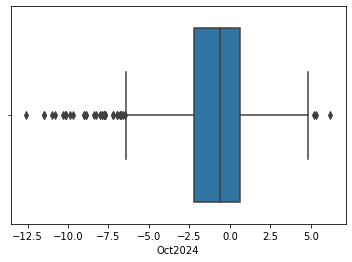

In [11]:
sns.boxplot(df_zhvf.Oct2024)

In [12]:
# Pulling cities with projected growth in the top 80th percentile for the next year
quantile = .8
q = df_zhvf.Oct2024.quantile(q=quantile)
topNextYear = df_zhvf.loc[df_zhvf.Oct2024 > q]
topNextYear

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,Nov2023,Jan2024,Oct2024
8,394856,8,"Miami, FL",msa,FL,2023-10-31,0.4,0.6,1.8
18,395148,18,"Tampa, FL",msa,FL,2023-10-31,0.1,-0.4,1.3
23,394458,23,"Charlotte, NC",msa,NC,2023-10-31,0.2,0.1,1.2
61,394312,62,"Albuquerque, NM",msa,NM,2023-10-31,0.3,0.3,1.5
64,394753,65,"Knoxville, TN",msa,TN,2023-10-31,0.5,0.8,3.6
...,...,...,...,...,...,...,...,...,...
870,753908,909,"Othello, WA",msa,WA,2023-10-31,0.0,0.3,1.8
871,753925,910,"Vineyard Haven, MA",msa,MA,2023-10-31,0.5,1.0,3.1
873,395003,912,"Price, UT",msa,UT,2023-10-31,-0.3,-0.5,2.3
885,394342,929,"Atchison, KS",msa,KS,2023-10-31,0.5,1.3,1.9


## Combined top cities with good historical value growth and future potential

In [13]:
# Merging top from forecast df and top from historical growth df
topAll = pd.merge(topNextYear, top80, how='inner')
topAll.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,Nov2023,Jan2024,Oct2024,2000-01-31,...,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,LastYrGrowth,LastFiveYrGrowth,LastTenYrGrowth
0,394753,65,"Knoxville, TN",msa,TN,2023-10-31,0.5,0.8,3.6,103162.726926,...,309015.245196,312656.238558,316893.603984,320712.688407,324529.333474,327862.367198,330699.773818,8.081275,45.213041,56.732187
1,394843,67,"McAllen, TX",msa,TX,2023-10-31,0.7,1.1,2.2,NaN,...,173707.977632,175147.057471,176424.923984,177313.499741,177968.425447,178939.577566,180419.208964,5.312822,39.756015,52.788088
2,394997,105,"Portland, ME",msa,ME,2023-10-31,0.5,0.6,1.8,136331.913646,...,478521.663027,484097.094899,489881.553684,494611.368909,498932.650896,503019.605726,506377.850666,7.359891,40.165409,54.328705
3,394589,109,"Fayetteville, NC",msa,NC,2023-10-31,0.2,0.2,1.3,102743.648942,...,216529.619969,218344.588325,219998.633972,221501.688259,222920.823202,224240.821476,225338.561506,7.913086,39.878601,42.466995
4,395070,138,"Savannah, GA",msa,GA,2023-10-31,0.4,0.5,1.8,114206.963324,...,301630.139391,304541.829004,307325.983019,310048.755489,312846.910003,315541.870444,317978.740536,7.627210,39.864063,51.020401
5,394747,167,"Kingsport, TN",msa,TN,2023-10-31,0.6,1.0,2.3,91136.869279,...,205905.555388,208234.439453,210711.847829,213210.719825,216147.882861,219073.413509,221533.957212,8.217415,39.715868,47.931135
6,395229,174,"Wilmington, NC",msa,NC,2023-10-31,0.2,-0.1,1.2,NaN,...,404012.465065,407329.945453,410759.944374,413677.824248,416046.392673,417739.572075,419184.162740,5.189948,39.570351,52.490479
7,394348,180,"Atlantic City, NJ",msa,NJ,2023-10-31,0.5,0.8,3.1,123638.556997,...,341236.491337,344295.445363,347476.193736,350369.953299,353393.441528,356221.369890,358520.238665,8.301713,41.850008,42.054331
8,394361,202,"Barnstable Town, MA",msa,MA,2023-10-31,0.5,0.6,1.6,199968.010366,...,691498.185987,698768.165361,708535.121087,717197.498340,724223.856647,730759.268102,736503.899503,5.750028,39.343147,50.030779
9,394681,216,"Hilton Head Island, SC",msa,SC,2023-10-31,0.3,0.3,1.9,191644.681480,...,499479.795103,502595.275327,506538.855526,510296.421989,513800.165722,516635.883833,519642.876438,5.410629,39.703084,50.663220


## Plotting top cities
### top 10 cities that are in the top 80th percentile for:
 - growth the past 5 years
 - growth the past year
 - forecasted growth for the next year

In [14]:
# Pull city names for first 10 cities from topAll df
topCityNames = topAll.RegionName.head(10)
print(topCityNames)

0             Knoxville, TN
1               McAllen, TX
2              Portland, ME
3          Fayetteville, NC
4              Savannah, GA
5             Kingsport, TN
6            Wilmington, NC
7         Atlantic City, NJ
8       Barnstable Town, MA
9    Hilton Head Island, SC
Name: RegionName, dtype: object


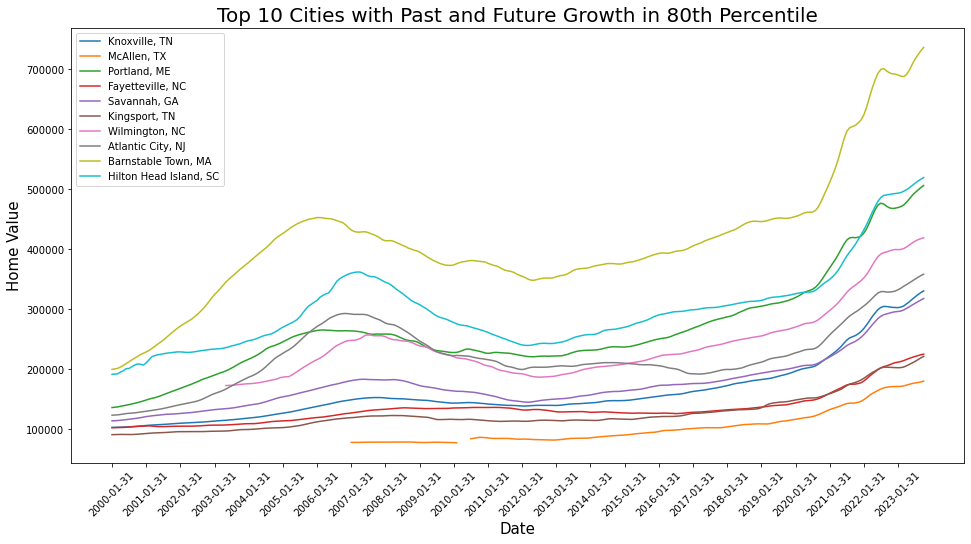

In [15]:
# Adjust figure size
fig, ax = plt.subplots(figsize=(16, 8))

# Add plot title and axis labels
plt.title('Top 10 Cities with Past and Future Growth in 80th Percentile', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Home Value', fontsize=15)

j = 0
names = []

while j < 10:
    name = topAll.iloc[j].RegionName
    names.append(name)
    
    city = topAll.iloc[j, 9:-3]
    ax.plot(city)
    
    if j == 0:
        # Rotaing axis ticks and selecting every 12th tick to display
        sub_ticks = []
        i = 0

        while i < len(list(city.index)):
            sub_ticks.append(list(city.index)[i])
            i = i + 12

        ticks = sub_ticks
        plt.xticks(ticks, rotation=45)
        plt.xticks(rotation=45)
        
    # Adding a legend
    ax.legend((names), loc='upper left')
    
    j = j + 1

plt.show()

- Get top 10 Home value as of 10/31/2023 heatmap

In [16]:
top10 = topAll.head(10)[['RegionName','2023-10-31']]
top10.set_index('RegionName', inplace=True)
top10 = top10.sort_values(by='2023-10-31', ascending=False)

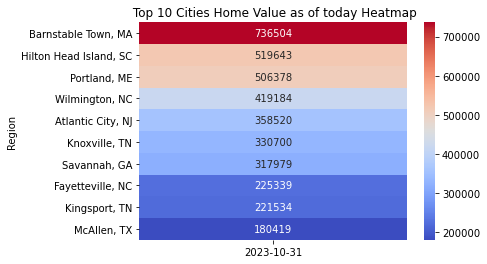

In [17]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.heatmap(top10[['2023-10-31']], annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title(' Top 10 Cities Home Value as of today Heatmap')
plt.ylabel('Region')
plt.show()

## Part 1: Conclusions
 - The average home value has increased 1.82% over the past year and 31.45% in the past 5 years.
 - Home values in the USA overall are forecast to decrease in value almost 1% in the next year. 
 - Using information from the Zillow Home Value Index and Home Value Forecast, we selected the top 10 cities from a subset of 50 cities that were in the 80th percentile or above for:
      - value growth over the past year
      - value growth over the past 5 years
      - forecasted growth for the next year
 - These represent good potential investments given that home prices are likely stable and will continue to rise. If you need to sell in the next few years, you are likely to make a profit. 

## Part 2: Rentals

Zillow Observed Rent Index (ZORI): A smoothed measure of the typical observed market rate rent across a given region. ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region, which is once again weighted to reflect the rental housing stock. 

- Data used:  ZORI All Homes plus multi family Time Series, Metro & US

In [18]:
df_zori = pd.read_csv('Metro_zori_uc_sfrcondomfr_sm_month Rent (ZORI).csv')

In [19]:
df_zori_now = df_zori[['RegionName','2023-10-31']]
df_zori_now.describe()

,2023-10-31
count,600.000000
mean,1485.624753
std,556.305687
min,609.629630
25%,1099.514423
50%,1370.880837
75%,1757.312128
max,5142.346561


<AxesSubplot:xlabel='2023-10-31'>

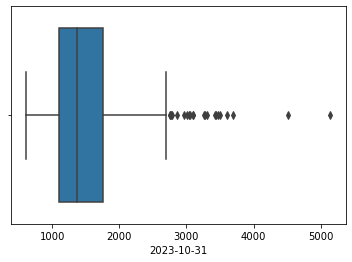

In [20]:
sns.boxplot(df_zori_now['2023-10-31'])

In [21]:
#Grab top 20 ZORI cities As of today
df_zori_top_20 = df_zori_now.sort_values(by='2023-10-31', ascending=False).head(20)
df_zori_top_20.set_index('RegionName', inplace=True)
df_zori_top_20['2023-10-31']

RegionName
Glenwood Springs, CO     5142.346561
Edwards, CO              4517.666667
Key West, FL             3688.690476
Heber, UT                3604.752646
Steamboat Springs, CO    3494.444444
Santa Maria, CA          3469.806724
Breckenridge, CO         3445.121693
Santa Cruz, CA           3429.406382
Kahului, HI              3304.543651
New York, NY             3282.753131
San Jose, CA             3259.934119
San Diego, CA            3102.252780
San Francisco, CA        3091.203587
Napa, CA                 3050.218205
Naples, FL               3031.755240
Oxnard, CA               3012.597169
Los Angeles, CA          2962.702328
Boston, MA               2854.661255
Bridgeport, CT           2783.145638
Miami, FL                2768.526924
Name: 2023-10-31, dtype: float64

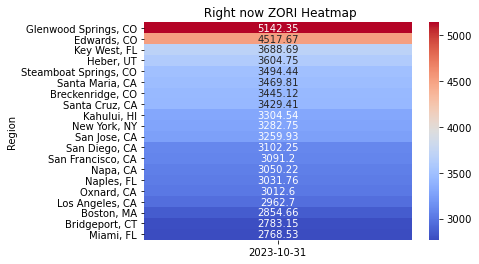

In [22]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.heatmap(df_zori_top_20[['2023-10-31']], annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title(' Right now ZORI Heatmap')
plt.ylabel('Region')
plt.show()

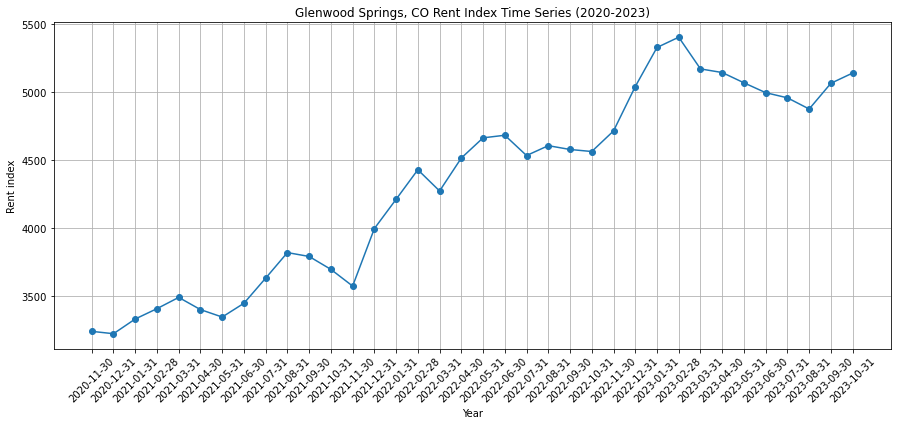

In [23]:
glenwood_time = df_zori[df_zori['RegionName']=='Glenwood Springs, CO'].T[-36:]
glenwood_time.columns = ['ZORI Rent index']
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
# plt.plot(df_national_trends.index, df_national_trends['Midwest'], marker='o', linestyle='-')
plt.plot(glenwood_time.index, glenwood_time['ZORI Rent index'], label='Rent price', marker='o', linestyle='-')
plt.title('Glenwood Springs, CO Rent Index Time Series (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Rent index')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

#### We can see from this plot, during the winter times the rent price goes up, this is because of the snow season.

In [24]:
# top10 region list
top10_region = []
for i in topAll.head(10)['RegionName']:
    top10_region.append(i)
    
rent10 = df_zori[df_zori['RegionName'].isin(top10_region)][['RegionName','2023-10-31']] # find recent rent in these top 10 place
rent10.set_index(['RegionName'],inplace = True)

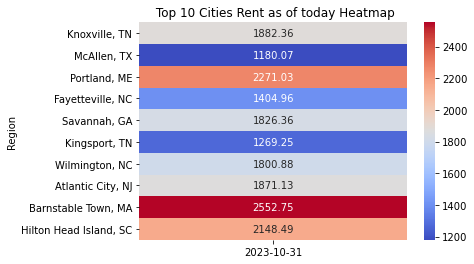

In [25]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.heatmap(rent10[['2023-10-31']], annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title(' Top 10 Cities Rent as of today Heatmap')
plt.ylabel('Region')
plt.show()

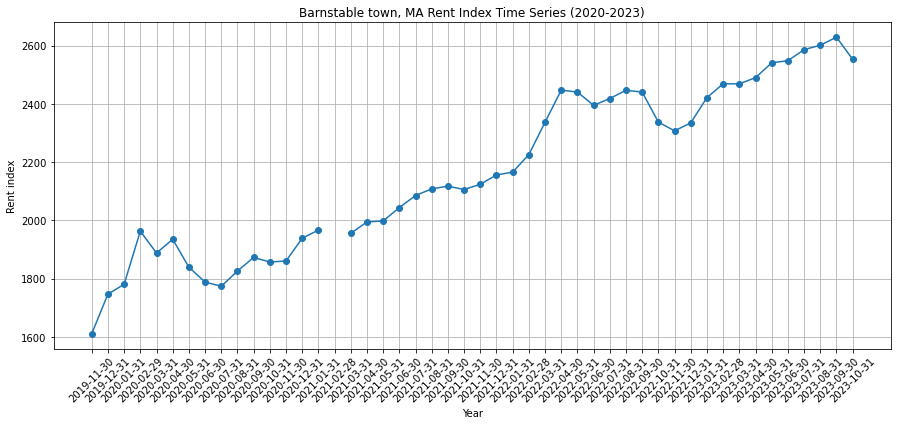

In [26]:
# Barnstable town time series rent
Barnstable_time = df_zori[df_zori['RegionName']=='Barnstable Town, MA'].T[-48:]
Barnstable_time.columns = ['ZORI Rent index']


plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
# plt.plot(df_national_trends.index, df_national_trends['Midwest'], marker='o', linestyle='-')
plt.plot(Barnstable_time.index, Barnstable_time['ZORI Rent index'], label='Rent price', marker='o', linestyle='-')
plt.title('Barnstable town, MA Rent Index Time Series (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Rent index')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

## Part 2: Conclusions
- Looking at one time spot: 10/31/2023 the average of the rent index is 1,485 among 600 cities. 
- From the Heatmap we can see the **Glenwood Springs CO** now ZORI is the highest, 5142.35, I believe this is because that we have snow season coming and a lot of people from all over the world flying to CO to get some ski and snowboarding.
- Other than that, the there are 8 cities in CA are staying TOP 20 ZORI
- From what we have seen in Part1, there are top 10 cities analyzed from Zillow Home Value Index and Home Value Forecast, looking at the rent part. Barnstable Town, MA rent price has been grown from 2019, from 1600 to today's 2552
- Based on the data analysis from Part 1 and 2, I believe we could consider invest **Glenwood Springs CO** or **Barnstable Town, MA** to receive maximum gains. 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df_national_trends = pd.read_csv('data-National_rentprice_trends.csv')
df_national_trends.head()
df_national_trends['Date'] = pd.to_datetime(df_national_trends['Date'])
df_national_trends.set_index('Date', inplace=True)

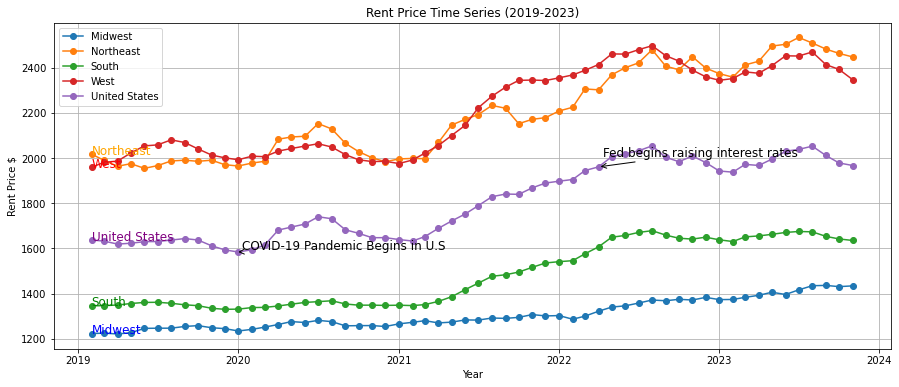

In [28]:
# Median asking rents in $USD from February 2019 to November 2023

plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
# plt.plot(df_national_trends.index, df_national_trends['Midwest'], marker='o', linestyle='-')
plt.plot(df_national_trends.index, df_national_trends['Midwest'], label='Midwest', marker='o', linestyle='-')
# Plot Northeast
plt.plot(df_national_trends.index, df_national_trends['Northeast'], label='Northeast', marker='o', linestyle='-')
# Plot South
plt.plot(df_national_trends.index, df_national_trends['South'], label='South', marker='o', linestyle='-')
# Plot West
plt.plot(df_national_trends.index, df_national_trends['West'], label='West', marker='o', linestyle='-')
# Plot US
plt.plot(df_national_trends.index, df_national_trends['United States'], label='United States', marker='o', linestyle='-')

plt.title('Rent Price Time Series (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Rent Price $')
plt.grid(True)

# Add a legend to distinguish between regions
plt.legend()

# Add labels to indicate the colors of the lines
plt.text(df_national_trends.index[0], df_national_trends['Midwest'].iloc[0], 'Midwest', fontsize=12, color='blue')
plt.text(df_national_trends.index[0], df_national_trends['Northeast'].iloc[0], 'Northeast', fontsize=12, color='orange')
plt.text(df_national_trends.index[0], df_national_trends['South'].iloc[0], 'South', fontsize=12, color='green')
plt.text(df_national_trends.index[0], df_national_trends['West'].iloc[0], 'West', fontsize=12, color='red')
plt.text(df_national_trends.index[0], df_national_trends['United States'].iloc[0], 'United States', fontsize=12, color='purple')



plt.annotate('COVID-19 Pandemic Begins in U.S', 
             xy=(pd.to_datetime('2020-01-01'), df_national_trends['United States']['2020-01-01']), 
             xytext=(pd.to_datetime('2020-01-10'), df_national_trends['United States']['2020-02-01']), 
             fontsize=12,
             arrowprops=dict(arrowstyle='->', color='black'))

plt.annotate('Fed begins raising interest rates', 
             xy=(pd.to_datetime('2022-04-01'), df_national_trends['United States']['2022-04-01']), 
             xytext=(pd.to_datetime('2022-04-10'), df_national_trends['United States']['2022-05-01']), 
             fontsize=12,
             arrowprops=dict(arrowstyle='->', color='black'))
plt.show()

## Part 2: Conclusions from other data 
- data source:https://www.rent.com/research/average-rent-price-report/
- From the plot we can see Median asking rents in USD from February 2019 to November 2023
    - From the rental purpose, the **Northeast** and **west** have higher price from 2019 to 2023 than other regions.

- 2020 Jan **COVID-19 Pandemic** Begins in U.S. So before that time, rent price stayed low and stable as 1600 in US. Between 2020 and 2021, the rent price fluctuated a little bit after that. When things getting back to normal, the inflation comes, rent price has been increased. 
- 2022 Apr Fed begins raising interest rates, the inflation is higher, and rent price has been increased.

## Part 3: Other Market Trends

Explore the sale and listing ratio. Is it going up or down?
 - Data used:  Median Sale-to-List Ratio (Raw, All Homes, Monthly):  Metro & US

Is the sale and inventory listening price going up or down overall?
 - Data used:  
 
How long are some of the houses on the market before they rent or sell?
 - Data used:  

### Sale To List Ratio
 - Sale-to-List Ratio (mean/median): Ratio of sale vs. final list price.

In [29]:
df_saleToList = pd.read_csv("SaleToListRatio_Median.csv")

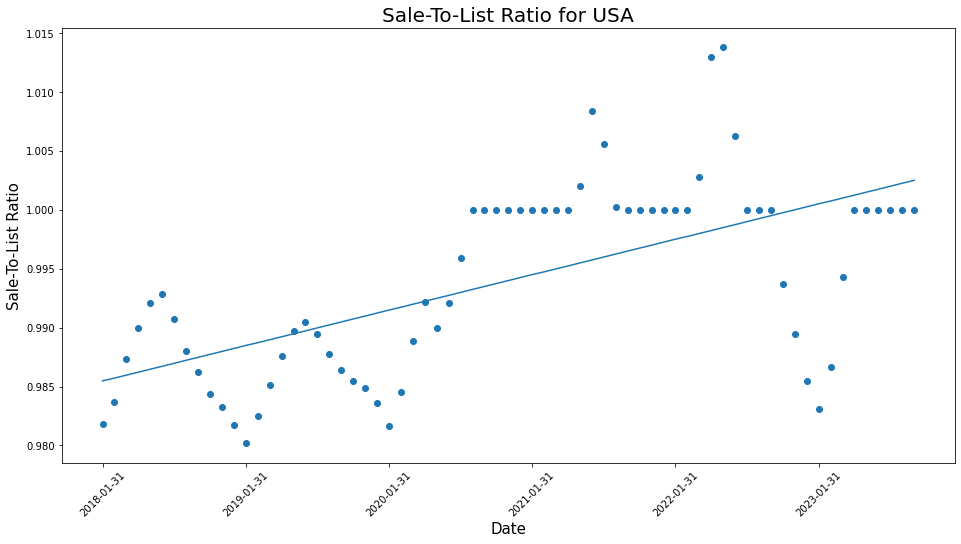

In [30]:
# Scatter Plot of USA Only
# x = list(df_saleToList.columns[5:])

# y = list(df_saleToList.iloc[0].values[5:])

# plt.scatter(x, y)

# Adjust figure size
fig, ax = plt.subplots(figsize=(16, 8))

# Add plot title and axis labels
plt.title('Sale-To-List Ratio for USA', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sale-To-List Ratio', fontsize=15)

x = list(df_saleToList.columns[5:])
y = list(df_saleToList.iloc[0].values[5:])
ax.scatter(x, y)
    
xNum = mdates.date2num(x)
z = np.polyfit(xNum, y, 1)
p = np.poly1d(z)
plt.plot(x,p(xNum))
    

# Rotaing axis ticks and selecting every 12th tick to display
sub_ticks = []
        
i = 0
city = df_saleToList.iloc[0, 5:]
while i < len(list(city.index)):
    sub_ticks.append(list(city.index)[i])
    i = i + 12

ticks = sub_ticks
plt.xticks(ticks, rotation=45)
plt.xticks(rotation=45)
    
plt.show()

In [31]:
usaChange = df_saleToList.iloc[0]['2023-09-30'] - df_saleToList.iloc[0]['2018-01-31']
print('Change in sale-to-listing ratio for US over the past 5 years: ')
print(usaChange)

Change in sale-to-listing ratio for US over the past 5 years: 
0.018181818181818188


In [32]:
# Pull USA row into separate dataframe
#df_saleToListUSA = df_saleToList.iloc[0]
# Remove USA as a whole from rest of dataframe
df_saleToList = df_saleToList.iloc[1:]

In [33]:
display(df_saleToList.head(10))

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
1,394913,1,"New York, NY",msa,NY,0.977727,0.976993,0.978520,0.979592,0.980039,...,1.000000,0.989202,0.987234,0.994994,1.000000,1.000000,1.003226,1.010811,1.006964,1.002639
2,753899,2,"Los Angeles, CA",msa,CA,0.997732,1.000000,1.000000,1.000000,1.000000,...,0.988736,0.986930,0.992854,1.000000,1.000000,1.001669,1.006289,1.006904,1.007246,1.000817
3,394463,3,"Chicago, IL",msa,IL,0.971160,0.972628,0.976923,0.979933,0.981136,...,0.983067,0.981326,0.985956,1.000000,1.000000,1.000000,1.000294,1.000145,1.000000,1.000000
4,394514,4,"Dallas, TX",msa,TX,0.987427,0.992593,0.996429,1.000000,1.000000,...,0.984271,0.981438,0.985672,0.996413,1.000000,1.000000,1.000000,1.000000,0.994985,0.992366
5,394692,5,"Houston, TX",msa,TX,0.975767,0.977528,0.978947,0.981901,0.981685,...,0.980280,0.978261,0.980645,0.984252,0.991648,0.990654,0.990857,0.990731,0.987421,0.984375
6,395209,6,"Washington, DC",msa,VA,0.993212,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000250,1.006711,1.003731,1.000194,1.000000,1.000000
7,394974,7,"Philadelphia, PA",msa,PA,0.979325,0.979592,0.984474,0.985612,0.989445,...,1.000000,0.991630,1.000000,1.000000,1.000000,1.000000,1.000667,1.000513,1.000082,1.000000
8,394856,8,"Miami, FL",msa,FL,0.961538,0.963415,0.965307,0.965285,0.965643,...,0.972000,0.968367,0.970803,0.972678,0.972414,0.973726,0.974706,0.977143,0.975904,0.977495
9,394347,9,"Atlanta, GA",msa,GA,0.981495,0.985470,0.988679,0.993342,0.995455,...,0.987124,0.985973,0.991089,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10,394404,10,"Boston, MA",msa,MA,0.989247,0.990220,0.998667,1.000000,1.000294,...,1.000000,0.992593,1.000000,1.000000,1.009524,1.024926,1.027514,1.019089,1.017462,1.008501


In [34]:
# Pull top 10 cities from saleToList dataframe
topCitiesList = list(topCityNames.values)

# Fill NAN values with a sentinal value
# McAllen, TX was the only location with a NAN value. A 0 value skewed the entire graph. 
# So I repeated the very first value present in that row.
df_saleToList_Top = df_saleToList[df_saleToList.RegionName.isin(topCitiesList)].fillna(0.979741)

df_saleToList_Top

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
64,394753,65,"Knoxville, TN",msa,TN,0.977199,0.978621,0.981524,0.985222,0.987325,...,0.985507,0.983333,0.992740,0.996314,1.000000,1.000000,1.000000,1.000000,1.000000,0.990476
66,394843,67,"McAllen, TX",msa,TX,0.979741,0.979741,0.979741,0.979741,0.979741,...,0.979741,0.975399,0.976732,0.970560,0.972201,0.981450,0.979167,0.981238,0.979962,0.981981
104,394997,105,"Portland, ME",msa,ME,0.979101,0.989467,0.990766,0.986175,1.000000,...,1.000000,1.000000,1.000000,1.006678,1.018591,1.031250,1.039370,1.025890,1.017995,1.008630
108,394589,109,"Fayetteville, NC",msa,NC,0.984674,0.984074,0.989733,0.987124,0.988889,...,1.000000,1.000000,1.000000,1.000000,1.000441,1.000326,1.000357,1.000286,1.000000,1.000000
137,395070,138,"Savannah, GA",msa,GA,0.977525,0.976267,0.983165,0.980895,0.986226,...,1.000000,0.997034,0.994586,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
164,394747,167,"Kingsport, TN",msa,TN,0.969529,0.970583,0.967204,0.975610,0.973592,...,0.979798,0.971090,0.964690,0.988453,0.985663,0.980952,0.979284,0.985663,1.000000,0.986940
171,395229,174,"Wilmington, NC",msa,NC,0.974499,0.976502,0.979992,0.984617,0.979507,...,0.982659,0.982763,0.987562,0.991649,1.000000,1.000000,1.000000,1.000000,0.993108,0.988907
177,394348,180,"Atlantic City, NJ",msa,NJ,0.959695,0.969135,0.969499,0.983178,0.970437,...,0.986364,0.980000,0.980392,0.997239,1.000000,0.989975,1.000000,1.000000,1.000000,1.000000
197,394361,202,"Barnstable Town, MA",msa,MA,0.968379,0.968946,0.970772,0.976735,0.977280,...,0.982857,0.971573,0.979838,0.992806,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
208,394681,216,"Hilton Head Island, SC",msa,SC,0.964870,0.962169,0.967041,0.966244,0.967185,...,0.977183,0.977995,0.977208,0.977073,0.982857,0.989538,0.987826,0.983607,0.983333,0.982411


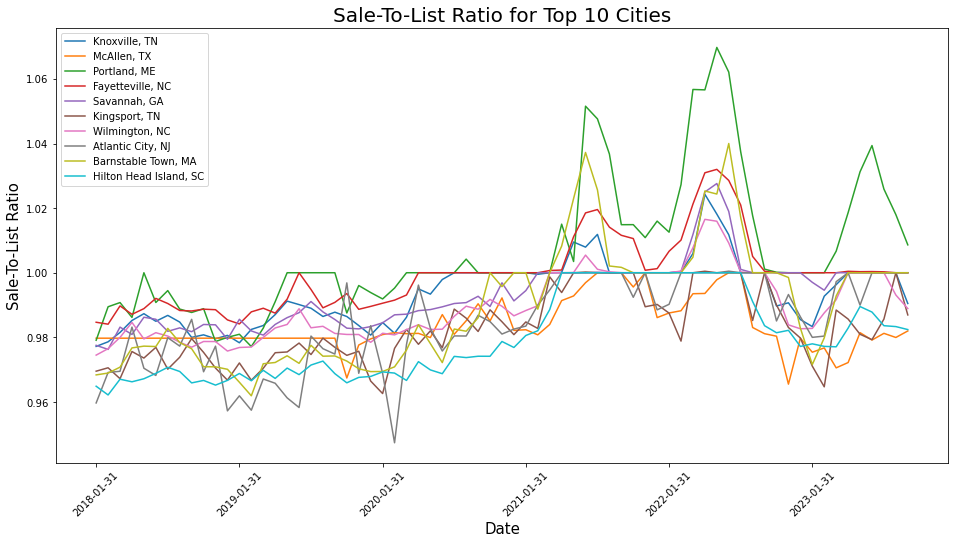

In [35]:
# Plotting Sale-To-List Ratio time series for top 10 cities

# Adjust figure size
fig, ax = plt.subplots(figsize=(16, 8))

# Add plot title and axis labels
plt.title('Sale-To-List Ratio for Top 10 Cities', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sale-To-List Ratio', fontsize=15)

j = 0
names = []

while j < 10:
    name = df_saleToList_Top.iloc[j].RegionName
    names.append(name)
    
    city = df_saleToList_Top.iloc[j, 5:]
    ax.plot(city)
    
    if j == 0:
        # Rotaing axis ticks and selecting every 12th tick to display
        sub_ticks = []
        
        i = 0
        while i < len(list(city.index)):
            sub_ticks.append(list(city.index)[i])
            i = i + 12

        ticks = sub_ticks
        plt.xticks(ticks, rotation=45)
        plt.xticks(rotation=45)
        
    # Adding a legend
    ax.legend((names), loc='upper left')
    
    j = j + 1

plt.show()

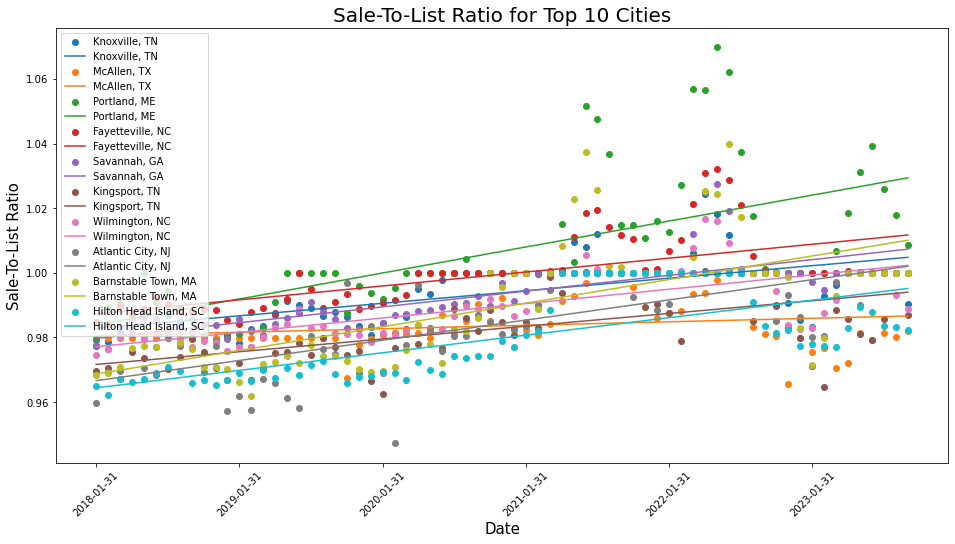

In [36]:
# Scatter Plot of the same data allows for better visualization of trends. 

# Adjust figure size
fig, ax = plt.subplots(figsize=(16, 8))

# Add plot title and axis labels
plt.title('Sale-To-List Ratio for Top 10 Cities', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sale-To-List Ratio', fontsize=15)

j = 0
names = []
x = list(df_saleToList_Top.columns[5:])

while j < 10:
    name = df_saleToList_Top.iloc[j].RegionName
    names.append(name)
    names.append(name)
    
    city = df_saleToList_Top.iloc[j, 5:]
    
    y = list(df_saleToList_Top.iloc[j].values[5:])
    ax.scatter(x, y)
    
    xNum = mdates.date2num(x)
    z = np.polyfit(xNum, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(xNum))
    
    if j == 0:
        # Rotaing axis ticks and selecting every 12th tick to display
        sub_ticks = []
        
        i = 0
        while i < len(list(city.index)):
            sub_ticks.append(list(city.index)[i])
            i = i + 12

        ticks = sub_ticks
        plt.xticks(ticks, rotation=45)
        plt.xticks(rotation=45)
        
    # Adding a legend
    ax.legend((names), loc='upper left')
    
    j = j + 1

plt.show()

In [25]:
# Add column for change over time?
df_saleToList_Top['totalChange'] = df_saleToList_Top['2023-09-30'] - df_saleToList_Top['2018-01-31']
df_saleToList_Top['totalChange'].describe()

count    10.000000
mean      0.020413
std       0.010899
min       0.002240
25%       0.014637
50%       0.017476
75%       0.027765
max       0.040305
Name: totalChange, dtype: float64

### For Sale Listings
 - Sale inventory shows the count of unique listings that were active at any time in a given month

Text(0, 0.5, 'Count of Unique Listings')

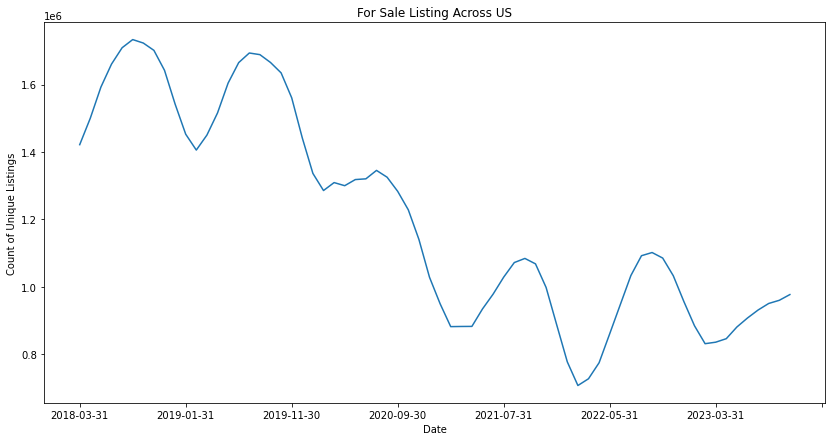

In [104]:
#read data and clean up columns
df_listings = pd.read_csv("ForSaleListings.csv")
df_listings = df_listings.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])

df_listings_t = df_listings

#set region name as index
df_listings_t.set_index('RegionName',inplace=True)

#transpose data to make it easier to graph
df_listings_t = df_listings.T

#graph overall US data
df_listings_t['United States'].plot(figsize=(14,7), title='For Sale Listing Across US')
plt.xlabel('Date')
plt.ylabel('Count of Unique Listings')

#### For the two towns chosen, Barnstable Town, MA & Glenwoods Springs, CO the trend in For-Sale Inventory is trending downwards overall but has started trending upwards since 03/31/23

Text(0, 0.5, 'Count of Unique Listings')

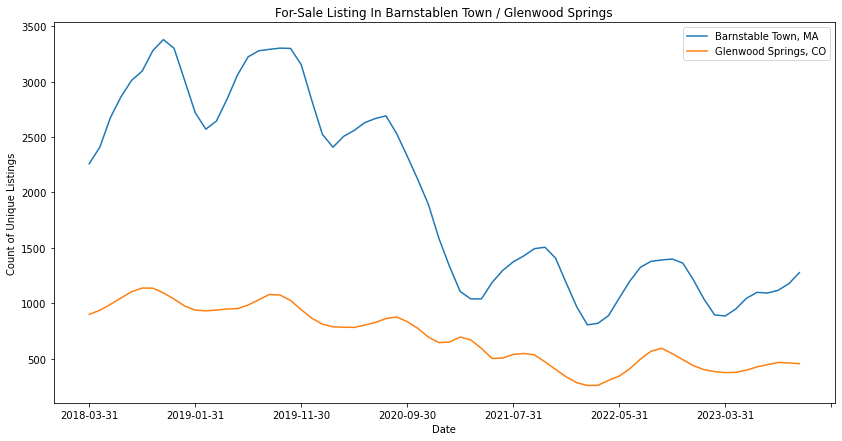

In [105]:
#plot graph for trends in Barnstable Town
df_listings_t['Barnstable Town, MA'].plot(figsize=(14,7), title='For-Sale Listing In Barnstablen Town / Glenwood Springs', legend='Barnstable Town')

#plot graph for trends in Glenwood Springs
df_listings_t['Glenwood Springs, CO'].plot(figsize=(14,7), legend='Barnstable Town')

plt.xlabel('Date')
plt.ylabel('Count of Unique Listings')

In [106]:
#drop US to get clear picture of data
try:
    df_listings_t = df_listings_t.drop(columns=['United States'])
except:
    df_listings_t

#determine last date in data set and set date intervals
latest_date = datetime.strptime(df_listings.columns[-1], '%Y-%m-%d').date()
sixMo = latest_date - relativedelta(months = 6)
oneYr = latest_date - relativedelta(years = 1)
threeYrs = latest_date - relativedelta(years = 3)
fiveYrs = latest_date - relativedelta(years = 5)

#create list of dates for set intervals
dates_ = [str(latest_date), str(sixMo), str(oneYr), str(threeYrs), str(fiveYrs)]

#only keep data that matches intervals set
df_listings_t = df_listings_t[df_listings_t.index.isin(dates_)]

df_listings_t

RegionName,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA","Boston, MA",...,"Atchison, KS","Fairfield, IA","Vermillion, SD","Sweetwater, TX","Pecos, TX","Zapata, TX","Ketchikan, AK","Craig, CO","Vernon, TX","Lamesa, TX"
2018-10-31,89340.0,30606.0,48916.0,32589.0,31475.0,23196.0,27618.0,50254.0,30823.0,15867.0,...,83.0,130.0,44.0,82.0,10.0,50.0,105.0,161.0,38.0,32.0
2020-10-31,80976.0,25306.0,40961.0,26449.0,25193.0,17313.0,19335.0,49227.0,26144.0,12939.0,...,42.0,88.0,35.0,50.0,15.0,23.0,87.0,168.0,21.0,33.0
2022-10-31,58241.0,21802.0,30798.0,22445.0,23545.0,15801.0,16002.0,32323.0,24318.0,10396.0,...,70.0,122.0,45.0,90.0,25.0,47.0,63.0,82.0,42.0,43.0
2023-04-30,44197.0,15103.0,21214.0,17959.0,20859.0,10456.0,12208.0,33640.0,18203.0,7151.0,...,58.0,99.0,27.0,88.0,17.0,50.0,66.0,56.0,37.0,34.0
2023-10-31,42565.0,16153.0,23698.0,23470.0,23349.0,11075.0,13177.0,32330.0,20641.0,7985.0,...,54.0,73.0,34.0,82.0,25.0,37.0,51.0,104.0,55.0,44.0


### Calculations - Midpoint Change Method¶
Absolute Change = new value - original value

Average Value = (new value + original value) / 2

Growth Rate = Absolute Change / Average value

Percent Change = Growth Rate * 100

In [107]:
def midPointPer (time_range, data):
    if time_range == '6month':
        ti = -2
    elif time_range == 'year':
        ti = -3
    elif time_range == '3year':
        ti = -4   
    elif time_range == '5year':
        ti = -5         
    old = data.iloc[ti][city]
    new = data.iloc[-1][city]
    
    absChg = new - old
    avgChg = (new + old) / 2
    growth = absChg / avgChg
    per_chg = growth * 100
    
    return per_chg

In [108]:
change_data = {}

for city in df_listings_t:
    date_data = {}
    
    date_data[dates_[1]] = midPointPer('6month', df_listings_t)
    date_data[dates_[2]] = midPointPer('year', df_listings_t)
    date_data[dates_[3]] = midPointPer('3year', df_listings_t)
    date_data[dates_[4]] = midPointPer('5year', df_listings_t)

    change_data[city] = date_data

percent_data = pd.DataFrame.from_dict(change_data)

percent_data

,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA","Boston, MA",...,"Atchison, KS","Fairfield, IA","Vermillion, SD","Sweetwater, TX","Pecos, TX","Zapata, TX","Ketchikan, AK","Craig, CO","Vernon, TX","Lamesa, TX"
2023-04-30,-3.762016,6.718710,11.061632,26.604552,11.264929,5.749849,7.634430,-3.971502,12.552775,11.020085,...,-7.142857,-30.232558,22.950820,-7.058824,38.095238,-29.885057,-25.641026,60.000000,39.130435,25.641026
2022-10-31,-31.101323,-29.766829,-26.056958,4.464772,-0.835928,-35.168924,-19.363241,0.021654,-16.357125,-26.233611,...,-25.806452,-50.256410,-27.848101,-9.302326,0.000000,-23.809524,-21.052632,23.655914,26.804124,2.298851
2020-10-31,-62.183405,-44.154466,-53.397052,-11.935335,-7.597544,-43.948147,-37.881398,-41.436051,-23.524634,-47.352323,...,25.000000,-18.633540,-2.898551,48.484848,50.000000,46.666667,-52.173913,-47.058824,89.473684,28.571429
2018-10-31,-70.922255,-61.819115,-69.457680,-32.533581,-29.643952,-70.736191,-70.797892,-43.407924,-39.569408,-66.090894,...,-42.335766,-56.157635,-25.641026,0.000000,85.714286,-29.885057,-69.230769,-43.018868,36.559140,31.578947


<AxesSubplot:xlabel='2023-04-30'>

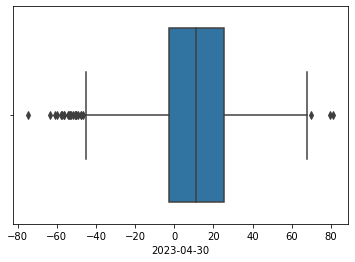

In [109]:
percent_data_t = percent_data.T
percent_data_t
sns.boxplot(percent_data.iloc[0])

<AxesSubplot:xlabel='2022-10-31'>

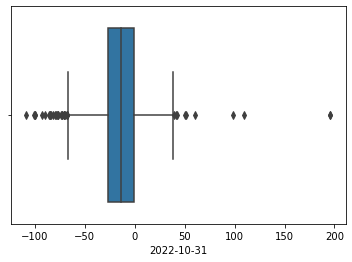

In [110]:
percent_data_t = percent_data.T
percent_data_t
sns.boxplot(percent_data.iloc[1])

In [122]:
#fitlering cities that are within top quantile
quantile = .8
q = percent_data.iloc[0].quantile(q=quantile)
threeMoTop = percent_data.iloc[0][percent_data.iloc[0] > q]

q = percent_data.iloc[1].quantile(q=quantile)
yearTop = percent_data.iloc[1][percent_data.iloc[1] > q]

q = percent_data.iloc[2].quantile(q=quantile)
fiveYearTop = percent_data.iloc[3][percent_data.iloc[3] > q]


In [123]:
new_forsale_data = pd.concat([threeMoTop, yearTop, fiveYearTop], axis=1)
new_forsale_data = new_forsale_data.dropna()
new_forsale_data = new_forsale_data.sort_values(by=['2022-10-31'], ascending=False)
new_forsale_data

,2023-04-30,2022-10-31,2018-10-31
"Port Lavaca, TX",42.335766,60.732984,30.023095
"Mitchell, SD",44.776119,29.370629,90.265487
"Levelland, TX",44.067797,27.368421,31.016043
"Vernon, TX",39.130435,26.804124,36.559140
"Gainesville, TX",36.633663,26.004728,13.870246


Text(0, 0.5, 'Count of Unique Listings')

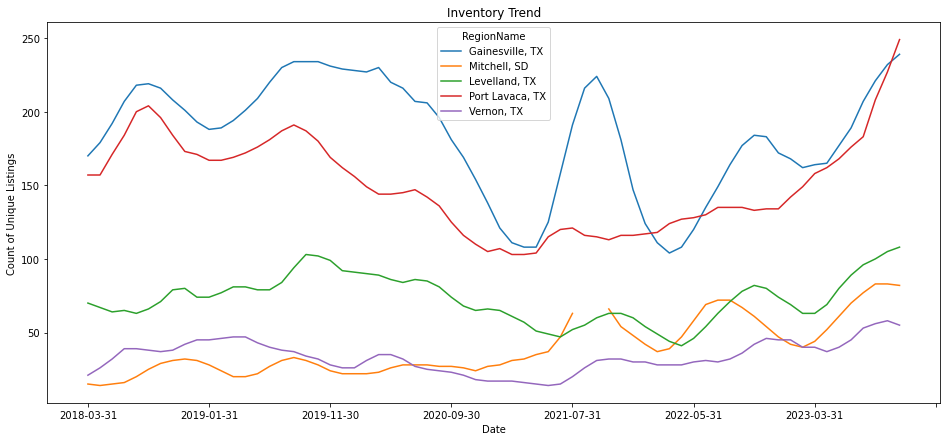

In [127]:
cities = new_forsale_data.index.values
cities = cities.tolist()

df_cities = df_listings

df_cities = df_cities[df_cities.index.isin(cities)]

df_cities.T.plot(figsize=(16,7), title='Inventory Trend')
plt.xlabel('Date')
plt.ylabel('Count of Unique Listings')

### Sales

The sles count nowcast estimates the number of unique properites that sold during the month

Text(0, 0.5, 'Count of Unique Sales')

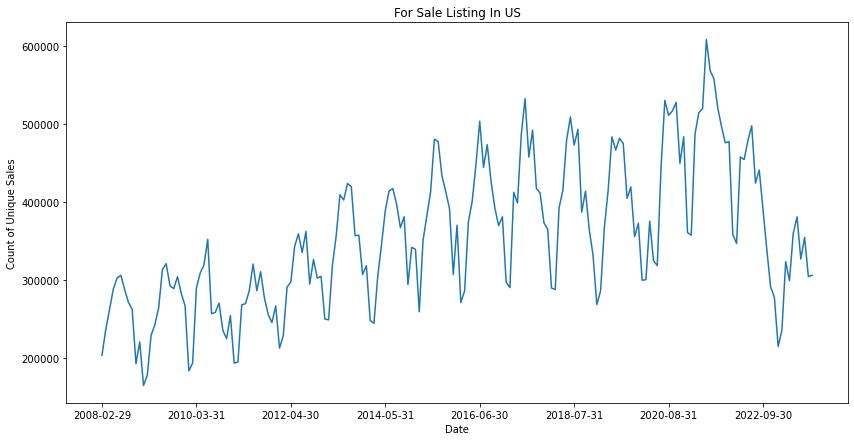

In [134]:
df_sales = pd.read_csv("Sales.csv")
df_sales = df_sales.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])

df_sales_t = df_sales

df_sales_t.set_index('RegionName',inplace=True)

df_sales_t = df_sales_t.T

df_sales_t['United States'].plot(figsize=(14,7),title='For Sale Listing In US')
plt.xlabel('Date')
plt.ylabel('Count of Unique Sales')

In [135]:
#drop US to get clear picture of data
try:
    df_sales_t = df_sales_t.drop(columns=['United States'])
except:
    df_sales_t

#determine last date in data set and set date intervals
latest_date = datetime.strptime(df_sales.columns[-1], '%Y-%m-%d').date()
sixMo = latest_date - relativedelta(months = 6)
oneYr = latest_date - relativedelta(years = 1)
threeYrs = latest_date - relativedelta(years = 3)
fiveYrs = latest_date - relativedelta(years= 5)

#create list of dates for set intervals
dates = [str(latest_date), str(sixMo), str(oneYr), str(threeYrs), str(fiveYrs)]

#only keep data that matches intervals set
df_sales_t = df_sales_t[df_sales_t.index.isin(dates)]

df_sales_t

RegionName,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA","Boston, MA","Phoenix, AZ",...,"Ogden, UT","Madison, WI","Winston, NC","Deltona, FL","Syracuse, NY","Provo, UT","Toledo, OH","Wichita, KS","Durham, NC","Fort Collins, CO"
2018-10-31,18697.0,8803.0,13362.0,7317.0,7554.0,8324.0,9159.0,10545.0,5110.0,8281.0,...,825.0,904.0,930.0,1416.0,932.0,665.0,800.0,651.0,795.0,510.0
2020-10-31,23101.0,11072.0,18046.0,9495.0,10670.0,10649.0,12056.0,12802.0,6696.0,10670.0,...,1134.0,1029.0,1199.0,1804.0,974.0,1082.0,875.0,744.0,979.0,793.0
2022-10-31,15135.0,6334.0,9333.0,6329.0,6336.0,7013.0,8073.0,8021.0,4100.0,5178.0,...,642.0,609.0,912.0,1175.0,639.0,515.0,737.0,344.0,696.0,409.0
2023-04-30,10284.0,6030.0,8629.0,6474.0,6180.0,5943.0,8692.0,7651.0,3146.0,6223.0,...,674.0,478.0,738.0,1262.0,316.0,580.0,639.0,223.0,683.0,385.0
2023-10-31,12847.0,5799.0,8626.0,5660.0,5212.0,6055.0,7843.0,6195.0,3777.0,4566.0,...,598.0,524.0,793.0,1100.0,647.0,459.0,623.0,285.0,596.0,334.0


In [136]:
sale_data = {}

for city in df_sales_t:
    date_data = {}
    
    date_data[dates[1]] = midPointPer('6month', df_sales_t)
    date_data[dates[2]] = midPointPer('year', df_sales_t)
    date_data[dates[3]] = midPointPer('3year', df_sales_t)
    date_data[dates[4]] = midPointPer('5year', df_sales_t)

    sale_data[city] = date_data

percent_sale_data = pd.DataFrame.from_dict(sale_data)

percent_sale_data

,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA","Boston, MA","Phoenix, AZ",...,"Ogden, UT","Madison, WI","Winston, NC","Deltona, FL","Syracuse, NY","Provo, UT","Toledo, OH","Wichita, KS","Durham, NC","Fort Collins, CO"
2023-04-30,22.160737,-3.905656,-0.034773,-13.416845,-16.994382,1.866978,-10.269126,-21.031345,18.229091,-30.716470,...,-11.949686,9.181637,7.184847,-13.717189,68.743510,-23.291627,-2.535658,24.409449,-13.604378,-14.186370
2022-10-31,-16.353370,-8.818924,-7.873490,-11.160230,-19.466574,-14.661769,-2.890173,-25.689364,-8.201092,-12.561576,...,-7.096774,-15.004413,-13.958944,-6.593407,1.244168,-11.498973,-16.764706,-18.759936,-15.479876,-20.188425
2020-10-31,-57.049071,-62.509632,-70.635873,-50.610360,-68.731898,-55.004789,-42.343836,-69.558351,-55.743340,-80.126017,...,-61.893764,-65.035415,-40.763052,-48.484848,-40.345466,-80.856587,-33.644860,-89.212828,-48.634921,-81.455191
2018-10-31,-37.091047,-41.145049,-43.078043,-25.537489,-36.691211,-31.559914,-15.480532,-51.971326,-29.998875,-57.834514,...,-31.904427,-53.221289,-15.902496,-25.119237,-36.098797,-36.654804,-24.877020,-78.205128,-28.612509,-41.706161


<AxesSubplot:xlabel='2023-04-30'>

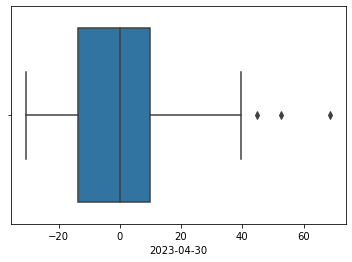

In [140]:
sns.boxplot(percent_sale_data.iloc[0])

<AxesSubplot:xlabel='2020-10-31'>

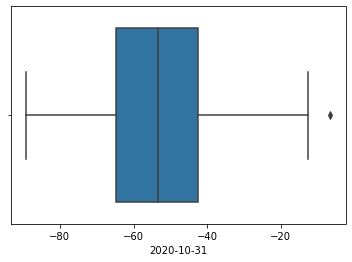

In [141]:
sns.boxplot(percent_sale_data.iloc[2])

In [142]:
#fitlering cities that are within top quantile
quantile = .8
q = percent_sale_data.iloc[0].quantile(q=quantile)
threeMoTop = percent_sale_data.iloc[0][percent_data.iloc[0] > q]

q = percent_sale_data.iloc[1].quantile(q=quantile)
yearTop = percent_sale_data.iloc[1][percent_data.iloc[1] > q]

q = percent_sale_data.iloc[3].quantile(q=quantile)
fiveyearTop = percent_sale_data.iloc[3][percent_data.iloc[3] > q]

In [143]:
sale_data = pd.concat([fiveyearTop, yearTop, threeMoTop], axis=1)
sale_data = sale_data.dropna()
sale_data.sort_values(by=['2023-04-30'], ascending=False)
sale_data

,2018-10-31,2022-10-31,2023-04-30
"San Antonio, TX",-36.907367,-26.756198,-25.448868
"Memphis, TN",-20.441537,0.792441,11.969112
"McAllen, TX",7.028754,5.714286,10.048622


Text(0, 0.5, 'Count of Unique Sales')

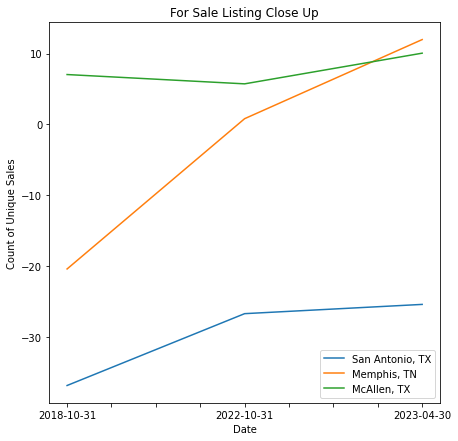

In [145]:
sale_data.T.plot(figsize=(7,7), title='For Sale Listing Close Up')
plt.xlabel('Date')
plt.ylabel('Count of Unique Sales')

### Sale & Inventory Summary 

Inventory is trending downwards in the past years but is trending up in the past six months, while sales are trending upwards. 

As sales increase, this causes the inventory to decrease. Paired with interest rates around 7%, this has caused exisisting homeowners to hold on to their homes, further decreasing inventory.

## Part 3: Conclusions

### Explore the sale and listing ratio. Is it going up or down?
 - Change in sale-to-listing ratio for US over the past 5 years: 0.0182
 - Mean change for our 10 top cities is just a bit higher than the USA average at 0.02. This indicates that buyers are spending approximately 2% more on the sale price compared with the final listing price. 
 - Looking at the trend lines, our top 10 cities are keeping pace with the USA overall. This should not disuade investment in these areas. 

### Is the sale and inventory listening price going up or down overall?
- Since 2018, both sales and inventory have had an overall downard trend. Focusing on the past five years and most recent six months has shown a reverse in trends
- As inventory decrease, the number of sales increase as we saw in the past. Recently, with inflation, interest rates have been around 7%, this has caused inventory to increase as homeowners want to hold on to their rates, 
- However, buyers have also bought houses to beat the increasing interest rates. 
- Barnstablen Town & Glenwood Springs both show an increase in available inventory, no data was available for sales. But following the trends, we can say there should also be an increase in sales occuring. 

### How long are some of the houses on the market before they rent or sell?


## Part 4: Profit Expectations

- How much average profit I could expect from my investments in terms of rent after paying mortgage?
- Since we come up with the conclusion that the Barnstable Town, MA is the best place to invest, we will make plan to buy house in Barnstable Town, MA

- Assume now 30y mortgage rate = 7% 
- Assume down payment = 20% 


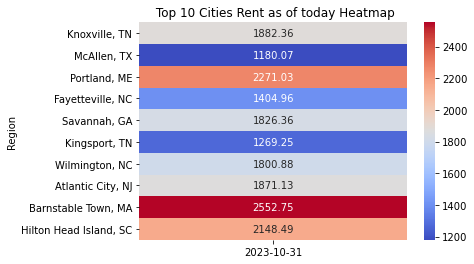

In [37]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.heatmap(rent10[['2023-10-31']], annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title(' Top 10 Cities Rent as of today Heatmap')
plt.ylabel('Region')
plt.show()

In [38]:
print('Buying one single family cost in Barnstable Town, MA is $', top10['2023-10-31'][0])
print('Assume we pay down payment 20%, total down payment = $', top10['2023-10-31'][0]*0.2)
mortgage = top10['2023-10-31'][0]*0.8
print('Total Mortgage amount in 30y is $',mortgage)


# Monthly pmt 30y, 7% mortgage rate
monthly_pmt = mortgage/(30*12)*(1+0.07)

print('monthly_pmt is after mortgage approximately $', monthly_pmt)

# Find the rent in Barnstable Town, MA
rent_barnstable = rent10.iloc[rent10.index.get_loc('Barnstable Town, MA')][0]

print('monthly_rent we can receive is $',rent_barnstable)

profit_each_month = round(rent_barnstable - monthly_pmt)
print('Profit we can get monthly is $', profit_each_month)

Buying one single family cost in Barnstable Town, MA is $ 736503.8995031818
Assume we pay down payment 20%, total down payment = $ 147300.77990063638
Total Mortgage amount in 30y is $ 589203.1196025455
monthly_pmt is after mortgage approximately $ 1751.2426054853438
monthly_rent we can receive is $ 2552.753846153846
Profit we can get monthly is $ 802


In [39]:
# Assume we all invest in this one place and using the mortgage to buy
countofhouse = round(7.5*1000000 / 147300)
print('Assume we all invest in this one place and using mortgage to pay down payment,')
print('We have 7.5M, total we can invest:', countofhouse,'houses in Barnstable Town, MA')
total_profit = profit_each_month *countofhouse
print('In that way we can make money 51 * one house profit each month = $',total_profit)

Assume we all invest in this one place and using mortgage to pay down payment,
We have 7.5M, total we can invest: 51 houses in Barnstable Town, MA
In that way we can make money 51 * one house profit each month = $ 40902


---
#### Check on another option Glenwood Springs, CO

In [40]:
# check on home value for 'Glenwood Springs, CO'
Glenwood_home = df_zhvi[df_zhvi['RegionName']=='Glenwood Springs, CO'][['RegionName','2023-10-31']].reset_index()

In [41]:
print('Buying one single family cost in Glenwood, CO as of 10/31/2023 is $', Glenwood_home['2023-10-31'][0])
print('Assume we pay down payment 20%, total down payment = $', Glenwood_home['2023-10-31'][0]*0.2)
mortgage = Glenwood_home['2023-10-31'][0]*0.8
Glenwood_down = Glenwood_home['2023-10-31'][0]*0.2
print('Total Mortgage amount in 30y is $',mortgage)


# Monthly pmt 30y, 7% mortgage rate
monthly_pmt = mortgage/(30*12)*(1+0.07)

print('monthly_pmt is after mortgage approximately $', monthly_pmt)

# Find the rent in Barnstable Town, MA
rent_glenwood = glenwood_time.iloc[-1][0]

print('monthly_rent we can receive is $',rent_glenwood)

profit_each_month = round(rent_glenwood - monthly_pmt)
print('Profit we can get monthly is $', profit_each_month)

Buying one single family cost in Glenwood, CO as of 10/31/2023 is $ 867201.3841968741
Assume we pay down payment 20%, total down payment = $ 173440.27683937483
Total Mortgage amount in 30y is $ 693761.1073574993
monthly_pmt is after mortgage approximately $ 2062.0121802014564
monthly_rent we can receive is $ 5142.346560846561
Profit we can get monthly is $ 3080


In [42]:
# Assume we all invest in this one place and using the mortgage to buy
countofhouse = round(7.5*1000000 / Glenwood_down)
print('Assume we all invest in this one place and using mortgage to pay down payment,')
print('We have 7.5M, total we can invest:', countofhouse,'houses in Glenwood, CO')
total_profit = profit_each_month *countofhouse
print('In that way we can make money 43 * one house profit each month = $',total_profit)

Assume we all invest in this one place and using mortgage to pay down payment,
We have 7.5M, total we can invest: 43 houses in Glenwood, CO
In that way we can make money 43 * one house profit each month = $ 132440


## Part 4: Conclusions
- For profit calculation we made some assumption for mortgage.
- We compared if we want to buy a house in **Barnstable Town, MA** or **Glenwood Spring, CO**

|   |    Barnstable Town, MA   |   Glenwood Spring, CO   |
 |  -  | -------- | ------- |
Monthly profit if buying one house| \$802   |\$ 3,080|
Monthly profit if invest all 7.5M to buy a bunch of houses| \$157,080   |\$ 132,440 |

- Based on this comparison, although if you buy one house the Glenwood it is making more money, but since we want to invest all 7.5M in buying houses, Barnstable's houses are cheaper so we can buy more in total, the total monthly profit Barnstable won! We can make \$157,080 every month if we buy 51 houses in Barnstable.

# Summary: 
### Where to invest: 
 - We narrowed down approximately 900 geographic areas to our top 10 choices for investment based on solid historic value growth and good future growth potential for the next year. 
 - Barnstable Town, MA is at the top of this list and could be a good area to place your investment. 
 - In addition to solid home values, Barnstable, MA has the highest rental values of our 10 cities. 
 - Looking at the sale-to-list ratio trend lines, our top 10 cities are keeping pace with the USA overall. This should not disuade investment in these areas. 
 - Looking at the profit in Barnstable, we can see we will make \$157,080 each month if we are doing mortgage and rental.

### When to invest: 
### 

 - Now is a good time to invest, since the mortgage rate are high but house prices are okay, and because of the trends, it is going to go up in the future, and we can also rent the houses to cover the mortgage payment.